# Redução da dimensionalidade

In [672]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import csv
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_s_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

## PCA

In [673]:
np.random.seed(2)
agrupamentos = 1
x,y = make_classification(n_features=3, n_redundant=0, n_informative=3,n_clusters_per_class=1, n_classes=1, n_samples=200)

pca3 = PCA(n_components=3)
pca3.fit(x)
proj_x3 = pca3.transform(x)
invProj3 = pca3.inverse_transform(proj_x3)

pca2 = PCA(n_components=2)
pca2.fit(x)
proj_x2 = pca2.transform(x)
invProj2 = pca2.inverse_transform(proj_x2)

print("pca3", proj_x3.shape)
print("pca2", proj_x2.shape)
print("pca3", invProj3.shape)
print("pca2", invProj2.shape)
print("explain. var.: ", pca3.explained_variance_)
print("explain. var.1: ", pca3.explained_variance_[0]/np.sum(pca3.explained_variance_))
print("explain. var. ratio: ", pca3.explained_variance_ratio_)
print("explain. var. ratio: ", np.cumsum(pca3.explained_variance_ratio_))

pca3 (200, 3)
pca2 (200, 2)
pca3 (200, 3)
pca2 (200, 3)
explain. var.:  [2.36160718 0.19942642 0.07137064]
explain. var.1:  0.8971293781916099
explain. var. ratio:  [0.89712938 0.07575828 0.02711234]
explain. var. ratio:  [0.89712938 0.97288766 1.        ]


In [674]:
print((0.897 + 0.076)/(0.897 + 0.076 + 0.027))

0.973


### Visualização

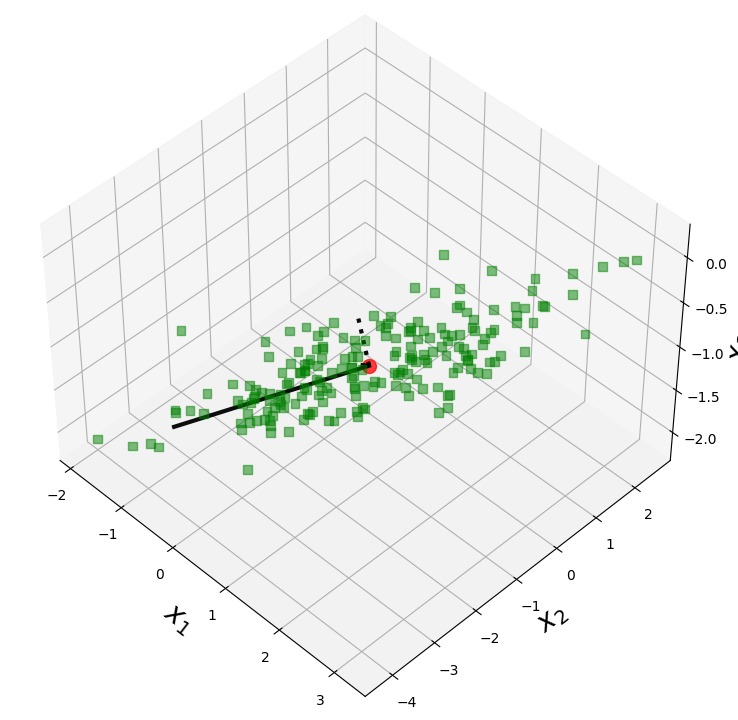

In [675]:
FS = (7,7)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.plot([pca3.mean_[0]], [pca3.mean_[1]], [pca3.mean_[2]], 'o', markersize=10, color='red', alpha=0.75)
LS = ['-','--',':']
countLS = 0

for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length)
    ax.plot(
        [pca3.mean_[0],v[0]+pca3.mean_[0]],
        [pca3.mean_[1],v[1]+pca3.mean_[1]],
        [pca3.mean_[2],v[2]+pca3.mean_[2]],
        color='black',
        linewidth=3,
        alpha=0.95,
        linestyle=LS[countLS])
    countLS = countLS+1

ax.view_init(45, -45)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

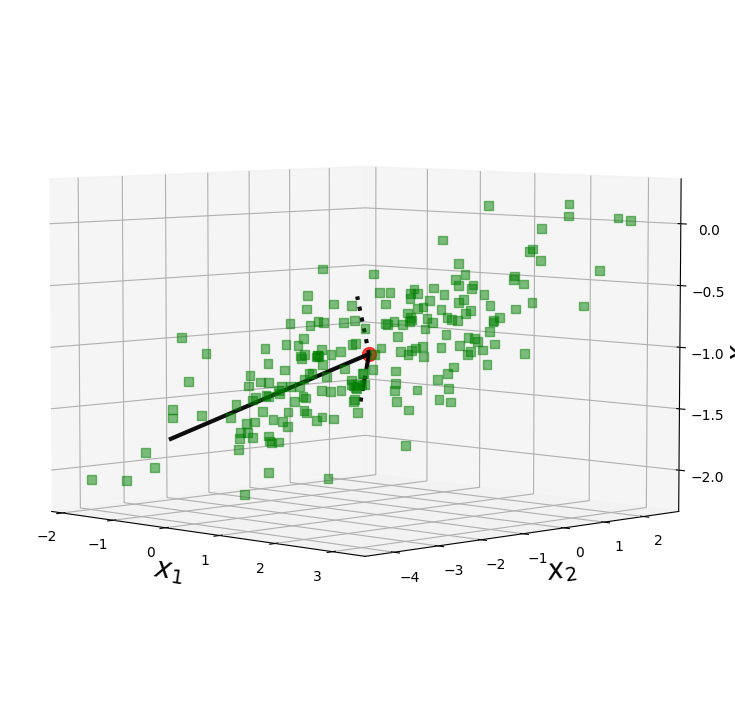

In [676]:
FS = (7,7)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.plot([pca3.mean_[0]], [pca3.mean_[1]], [pca3.mean_[2]], 'o', markersize=10, color='red', alpha=0.75)
LS = ['-','--',':']
countLS = 0

for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length)
    ax.plot(
        [pca3.mean_[0],v[0]+pca3.mean_[0]],
        [pca3.mean_[1],v[1]+pca3.mean_[1]],
        [pca3.mean_[2],v[2]+pca3.mean_[2]],
        color='black',
        linewidth=3,
        alpha=0.95,
        linestyle=LS[countLS])
    countLS = countLS+1

ax.view_init(5, -45)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

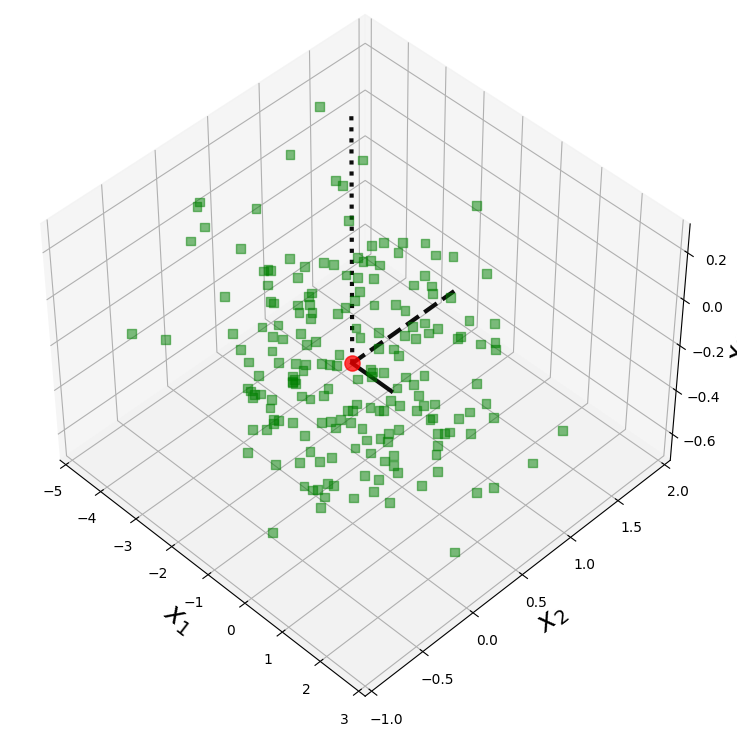

In [677]:
FS = (7,7)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
px = np.mean(proj_x3,axis=0)
ax.scatter(proj_x3[:, 0], proj_x3[:, 1], proj_x3[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.scatter(px[0],px[1],px[2], marker='o', c='red', s=120, alpha=0.75)
ax.plot([0,1],[0,0],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='-')
ax.plot([0,0],[0,1],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='--')
ax.plot([0,0],[0,0],[0,1],color='black',linewidth=3,alpha=0.95,linestyle=':')
ax.view_init(45, -45)
ax.set_xlim(-5,3)
ax.set_ylim(-1,2)
ax.set_zlim(-0.7,0.3)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

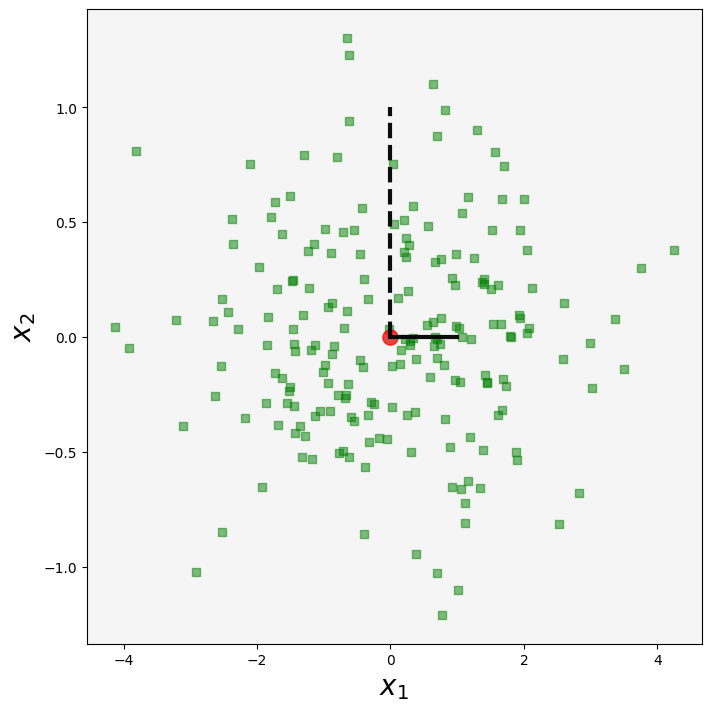

In [678]:
FS = (7,7)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0], facecolor='whitesmoke')
ax.scatter(proj_x2[:, 0], proj_x2[:, 1], marker='s', c='green', s=40, alpha=0.5) # type: ignore
ax.plot([0,1],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='-')
ax.plot([0,0],[0,1],color='black',linewidth=3,alpha=0.95,linestyle='--')
px = np.mean(proj_x2,axis=0)
ax.scatter(px[0],px[1], marker='o', c='red', s=120, alpha=0.75) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
plt.show()

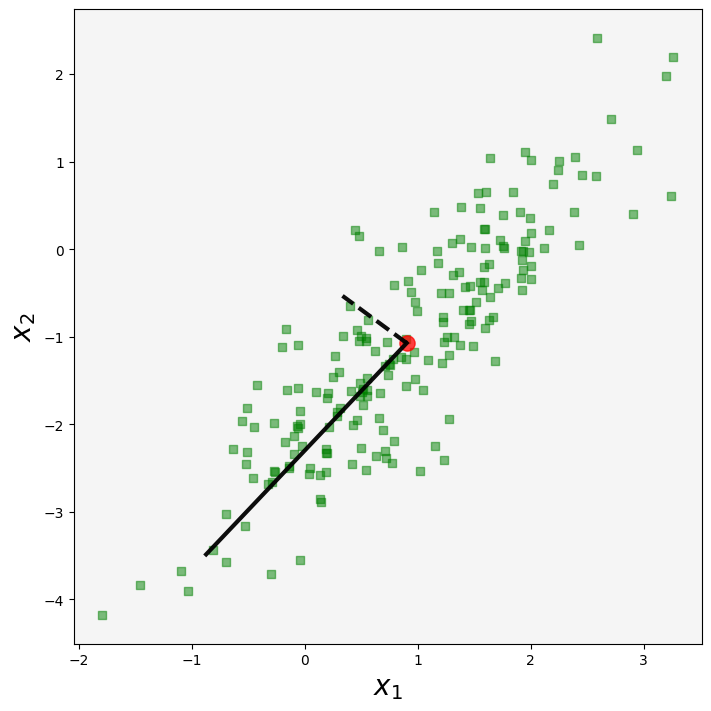

In [679]:
FS = (7,7)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0], facecolor='whitesmoke')
ax.scatter(invProj2[:, 0], invProj2[:, 1], marker='s', c='green', s=40, alpha=0.5) # type: ignore
LS = ['-','--',':']
countLS = 0

for length, vector in zip(pca2.explained_variance_, pca2.components_):
    v = vector * 2 * np.sqrt(length)
    ax.plot(
        [pca2.mean_[0],v[0]+pca2.mean_[0]],
        [pca2.mean_[1],v[1]+pca2.mean_[1]],
        color='black',
        linewidth=3,
        alpha=0.95,
        linestyle=LS[countLS])
    countLS = countLS+1
px = np.mean(invProj2,axis=0)
ax.scatter(px[0],px[1], marker='o', c='red', s=120, alpha=0.75) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
plt.show()

## LLE

In [680]:
n_points = 1000
x, color = make_s_curve(n_points, random_state=0)
n_neighbors = 20
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard', random_state=0)
y = lle.fit_transform(x)

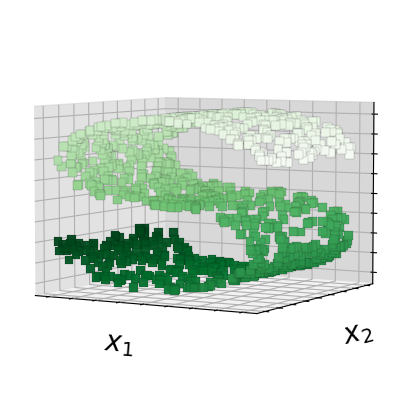

In [681]:
FS = (5,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0,0], projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', s=40, c=color, cmap=cm.Greens, alpha=0.95, edgecolors='k', linewidths=0.10) # type: ignore
ax.view_init(5, -60)

ax.w_xaxis.set_pane_color((0.85, 0.85, 0.85, 0.75))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)

ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_zaxis().set_ticklabels([])

plt.show()

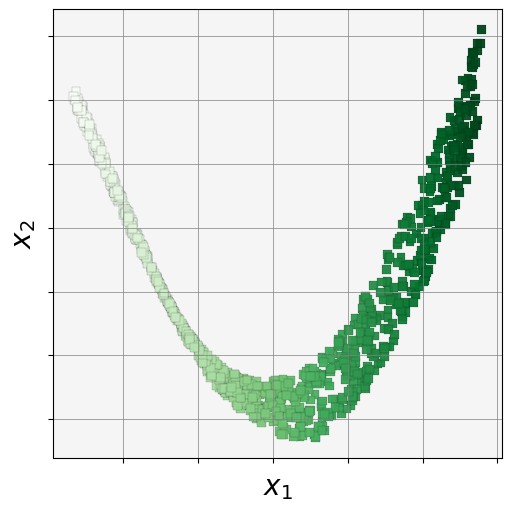

In [682]:
FS = (5, 5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0], facecolor='whitesmoke')
ax.scatter(y[:, 0], y[:, 1], marker='s', s=40, c=color, cmap=cm.Greens, alpha=0.95, edgecolors='k', linewidths=0.10) # type: ignore

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])

plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

### Exemplos

In [683]:
np.random.seed(2)
x,y = make_classification(n_features=3, n_redundant=0, n_informative=3,n_clusters_per_class=1, n_classes=1, n_samples=200)
pca = PCA(n_components=2)
pca.fit(x)
proj_x = pca.transform(x)
reproj_x = pca.inverse_transform(proj_x)

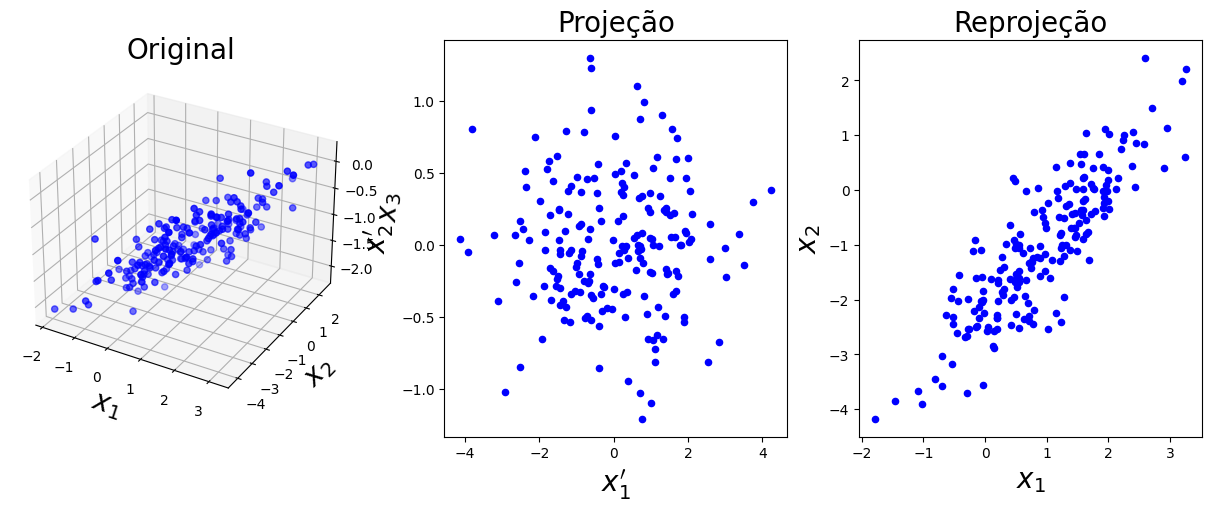

In [684]:
FS = (12,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
ax.set_title('Original',fontsize=20)

# dados projetados (eixos ortogonais)
ax = fig.add_subplot(spec[0, 1])
ax.scatter(proj_x[:, 0], proj_x[:, 1], marker='o', c='blue', s=20) # type: ignore
ax.set_xlabel('$x_1^\prime$', fontsize=20)
ax.set_ylabel('$x_2^\prime$', fontsize=20)
ax.set_title('Projeção', fontsize=20)

# dados reprojetados (espaço original)
ax = fig.add_subplot(spec[0, 2] )
ax.scatter(reproj_x[:, 0], reproj_x[:, 1], marker='o', c='blue', s=20) # type: ignore
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title('Reprojeção',fontsize=20)
plt.show()

In [685]:
print('Vetor médio: ', pca.mean_)
print('Eixos/componentes: ',pca.components_)
print('Autovalores: ',pca.explained_variance_)
print(pca.explained_variance_[0]/np.sum(pca.explained_variance_))

Vetor médio:  [ 0.90299845 -1.07039761 -1.03876576]
Eixos/componentes:  [[-0.57760735 -0.7854809  -0.22223749]
 [-0.63655426  0.603836   -0.47977158]]
Autovalores:  [2.36160718 0.19942642]
0.922130494597179


### Análise sobre a redução do número de atributos

In [686]:
pca3 = PCA(n_components=3)
pca3.fit(x)
proj_x3 = pca3.transform(x)
invProj3 = pca3.inverse_transform(proj_x3)

pca2 = PCA(n_components=2)
pca2.fit(x)
proj_x2 = pca2.transform(x)
invProj2 = pca2.inverse_transform(proj_x2)

In [687]:
print("Apenas uma comparação sobre a dimensão dos dados antes/após reprojeção")
print("pca3",proj_x3.shape)
print("pca2",proj_x2.shape)
print("pca3",invProj3.shape)
print("pca2",invProj2.shape)

print("\n")
print("Variância explicada: ",pca3.explained_variance_)
print("Variância explicada do 1o atributo: ",pca3.explained_variance_[0]/np.sum(pca3.explained_variance_))
print("Razão da variância explicada: ",pca3.explained_variance_ratio_)
print("Soma acumulada das variâncias explicadas: ", np.cumsum(pca3.explained_variance_ratio_))

Apenas uma comparação sobre a dimensão dos dados antes/após reprojeção
pca3 (200, 3)
pca2 (200, 2)
pca3 (200, 3)
pca2 (200, 3)


Variância explicada:  [2.36160718 0.19942642 0.07137064]
Variância explicada do 1o atributo:  0.8971293781916099
Razão da variância explicada:  [0.89712938 0.07575828 0.02711234]
Soma acumulada das variâncias explicadas:  [0.89712938 0.97288766 1.        ]


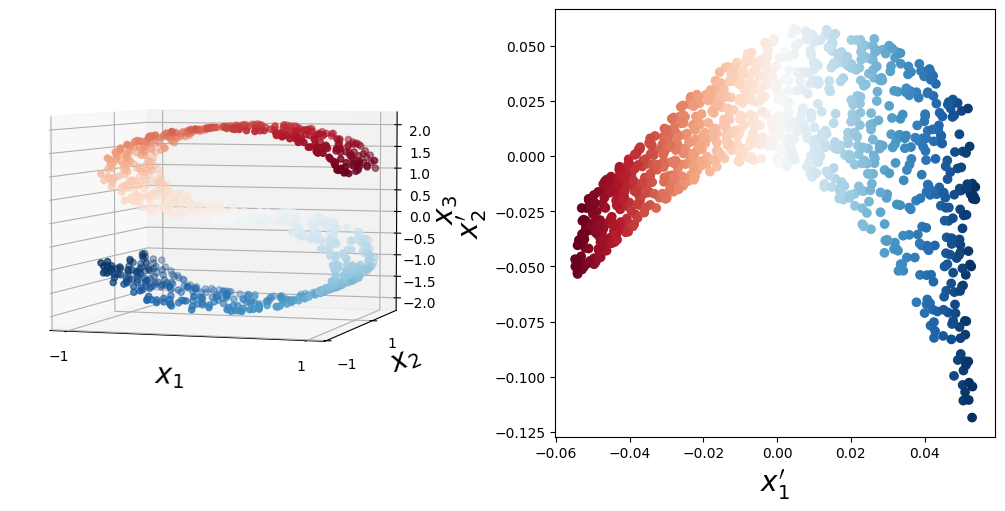

In [688]:
n_points = 1000
x, color = make_s_curve(n_points, random_state=0)
n_neighbors = 11
n_components = 2

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard', random_state=0)
transX = lle.fit_transform(x)

FS = (10,5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0,0], projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=color, cmap=cm.RdBu) # type: ignore
ax.view_init(4, -72)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)
ax.set_zlabel('$x_3$',fontsize=20)
ax.set_xticks([-1,1])
ax.set_yticks([-1,1])

ax = fig.add_subplot(spec[0,1])
ax.scatter(transX[:, 0], transX[:, 1], c=color, cmap=cm.RdBu) # type: ignore
ax.set_xlabel('$x_1^\prime$',fontsize=20)
ax.set_ylabel('$x_2^\prime$',fontsize=20)
plt.show()

In [689]:
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        count = 0
        for row in reader:
            if count != 0:
                try:
                    data = np.vstack((data , np.asarray(row).astype(float))) # type: ignore
                except:
                    data = np.asarray(row).astype(float)
            count += 1
    f.close()
    y = data[:,0] # type: ignore
    x = data[:,1:] # type: ignore
    return y,x

In [690]:
def compute_info(Z,x,posY):
    m,_ = x.shape
    mu = np.mean(x[:,Z],axis=0).reshape((1,len(Z)))
    Sb = np.zeros((len(Z),len(Z)))
    Sw = np.zeros((len(Z),len(Z)))
       
    for j in range(0,len(labY)): # type: ignore
        _x = x[posY[j],:]; _x = _x[:,Z]
        mu_j = np.mean(_x,axis=0).reshape((1,len(Z)))
        sig_j = np.cov(_x.T).reshape((len(Z),len(Z)))
        Sb += (len(posY[j])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
        Sw += (len(posY[j])/m) * sig_j

    return np.linalg.det(Sb+Sw)/np.linalg.det(Sw)

In [691]:
def compute_info_gain_add(Z,W,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(W))
    for at in range(len(W)):
        S = np.union1d(Z,W[at])
        S = np.int64(S).tolist()
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S))) # type: ignore
        Sb = np.zeros((len(S),len(S))) # type: ignore
        Sw = np.zeros((len(S),len(S))) # type: ignore

        for j in range(0,len(posY)):
            _x = x[posY[j],:]; _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S))) # type: ignore
            sig_j = np.cov(_x.T).reshape((len(S),len(S))) # type: ignore
            Sb += (len(posY[j])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
            Sw += (len(posY[j])/m) * sig_j

        vecJ[at] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
        
    return vecJ

In [692]:
def compute_info_gain_remove(Z,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(Z))

    for item in range(len(Z)):
        at = Z[item]
        S = Z.copy(); S.remove(at)
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S)))
        Sb = np.zeros((len(S),len(S)))
        Sw = np.zeros((len(S),len(S)))

        for j in range(0,len(posY)):
            _x = x[posY[j],:]; _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
            sig_j = np.cov(_x.T).reshape((len(S),len(S)))
            Sb += (len(posY[j])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
            Sw += (len(posY[j])/m) * sig_j

        vecJ[item] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
   
    return vecJ

## SFS

In [693]:
np.random.seed(0)
atributos = 40
agrupamentos = 15
redundante = 25
x, y = make_classification(
    n_features=atributos,
    n_redundant=redundante,
    n_informative=atributos-redundante,
    n_clusters_per_class=np.int32((atributos-redundante)/agrupamentos),
    n_classes=agrupamentos, n_samples=1000)
n_sel = 19
x, y = make_classification(n_features=40, n_redundant=25, n_informative=15, n_clusters_per_class=1, n_classes=15, n_samples=1000)

conf Z:  [20, 29, 6, 14, 24, 0, 9, 10, 17, 31, 35, 11, 30, 22, 8, 4, 34, 32, 23]
conf W:  [1, 2, 3, 5, 7, 12, 13, 15, 16, 18, 19, 21, 25, 26, 27, 28, 33, 36, 37, 38, 39]


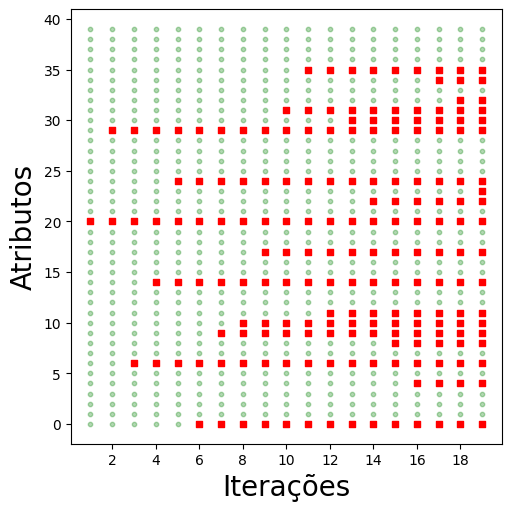

In [694]:
FS = (5, 5)
fig = plt.figure(constrained_layout=True, figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações',fontsize=20)
ax.set_ylabel('Atributos',fontsize=20)
W = [i for i in range(atributos)]
Z = []

labY ={}
for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

posIter = 1

while len(Z) < n_sel:
    ind = np.argmax( compute_info_gain_add(Z,W,x,labY))
    Z.append(W[ind])
    W.remove(W[ind]) 
    for el in W: ax.scatter(posIter,el,marker='o', c='green', s=10, alpha=0.3) # type: ignore
    for el in Z: ax.scatter(posIter,el,marker='s', c='red', s=25, alpha=1.0) # type: ignore
    posIter += 1

print('conf Z: ',Z)
print('conf W: ',W)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
z1 = Z
plt.show()

## SBS

conf Z:  [1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 17, 22, 23, 25, 27, 30, 31, 35, 37]
conf W:  [0, 8, 19, 36, 39, 16, 28, 12, 29, 21, 15, 7, 32, 34, 4, 24, 20, 38, 33, 26, 18]


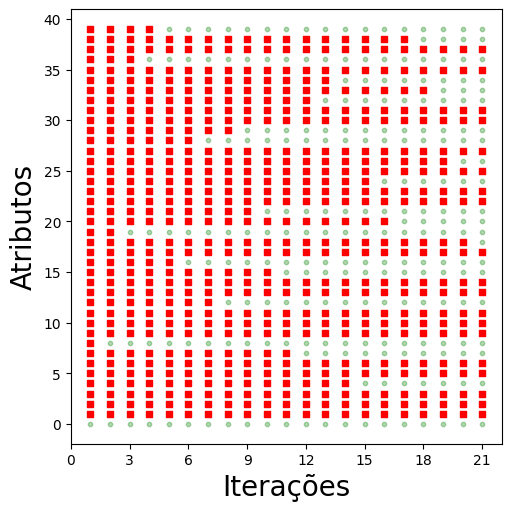

In [695]:
FS = (5,5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações',fontsize=20)
ax.set_ylabel('Atributos',fontsize=20)
W = []
Z = [i for i in range(atributos)]

labY ={}
for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

posIter = 1
while len(Z) > n_sel:
    ind = np.argmax( compute_info_gain_remove(Z,x,labY) )  #argmax significa que ao remover, não fez muita diferença!
    W.append(Z[ind])
    Z.remove(Z[ind])
    for el in W: ax.scatter(posIter, el, marker='o', c='green', s=10, alpha=0.3) # type: ignore
    for el in Z: ax.scatter(posIter, el, marker='s', c='red', s=25, alpha=1.0) # type: ignore
    posIter += 1
    
print('conf Z: ',Z)
print('conf W: ',W)

z2 = Z
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## SFFS

entrou 20 card. 1
entrou 29 card. 2
entrou 6 card. 3
entrou 14 card. 4
entrou 24 card. 5
entrou 0 card. 6
entrou 9 card. 7
entrou 10 card. 8
entrou 17 card. 9
entrou 31 card. 10
entrou 35 card. 11
entrou 11 card. 12
entrou 30 card. 13
entrou 22 card. 14
entrou 8 card. 15
entrou 4 card. 16
saiu 14 card. 15
saiu 6 card. 14
saiu 11 card. 13
saiu 31 card. 12
saiu 24 card. 11
saiu 30 card. 10
saiu 35 card. 9
saiu 0 card. 8
saiu 8 card. 7
entrou 3 card. 8
entrou 18 card. 9
entrou 27 card. 10
entrou 19 card. 11
entrou 32 card. 12
entrou 2 card. 13
entrou 16 card. 14
entrou 28 card. 15
entrou 0 card. 16
saiu 3 card. 15
saiu 20 card. 14
entrou 35 card. 15
entrou 3 card. 16
entrou 33 card. 17
saiu 35 card. 16
entrou 35 card. 17
saiu 9 card. 16
entrou 9 card. 17
saiu 33 card. 16
saiu 10 card. 15
saiu 22 card. 14
saiu 4 card. 13
saiu 29 card. 12
saiu 32 card. 11
saiu 35 card. 10
saiu 16 card. 9
saiu 28 card. 8
saiu 18 card. 7
saiu 0 card. 6
saiu 17 card. 5
entrou 13 card. 6
entrou 26 card. 7
entro

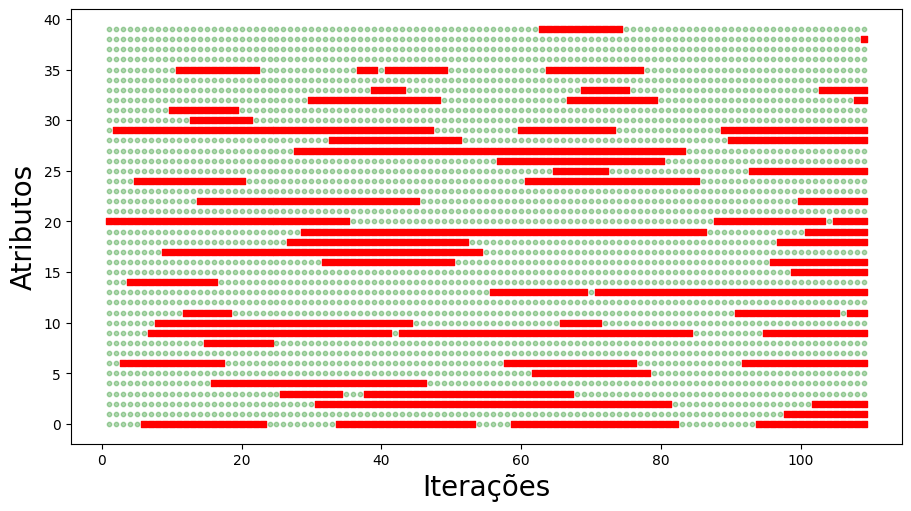

In [696]:
FS = (9, 5)
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações', fontsize=20)
ax.set_ylabel('Atributos', fontsize=20)
W = [i for i in range(atributos)]
Z = []
posIter = 1
labY = {}

for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

while len(Z) < n_sel:
    indAdd = np.argmax( compute_info_gain_add(Z,W,x,labY) )
    Z.append(W[indAdd])
    print('entrou',W[indAdd],'card.',len(Z))
    W.remove(W[indAdd])
    
    for el in W: ax.scatter(posIter, el, marker='o', c='green', s=10, alpha=0.3) # type: ignore
    for el in Z: ax.scatter(posIter, el, marker='s', c='red', s=25, alpha=1.0) # type: ignore
    posIter += 1
    Jadd = compute_info(Z,x,labY)

    while True:
        if (len(Z) <= 1) or (len(Z) == n_sel): break
        indRem = np.argmax( compute_info_gain_remove(Z,x,labY) )
        tempZ = Z.copy(); tempZ.remove(Z[indRem])
        Jrem = compute_info(tempZ,x,labY)

        if (Jrem < Jadd) or (Z[-1] == Z[indRem]): break
        else:
            print('saiu',Z[indRem],'card.',len(Z)-1)
            W.append(Z[indRem])
            Z.remove(Z[indRem])            
            
            for el in W: ax.scatter(posIter, el, marker='o',c='green', s=10, alpha=0.3) # type: ignore
            for el in Z: ax.scatter(posIter, el, marker='s',c='red', s=25, alpha=1.0) # type: ignore
            posIter += 1
            
print('Atributos selecionados: ',Z)
selAtributos = np.int64(Z) # type: ignore
plt.show()

In [697]:
print(np.sort(Z))
print(np.sort(z1))
print(np.sort(z2))

[ 0  1  2  6  9 11 13 15 16 18 19 20 22 25 28 29 32 33 38]
[ 0  4  6  8  9 10 11 14 17 20 22 23 24 29 30 31 32 34 35]
[ 1  2  3  5  6  9 10 11 13 14 17 22 23 25 27 30 31 35 37]


In [698]:
print(x.shape[0])

1000


In [699]:
zinter = np.intersect1d(z1,z2)
print(z1)
print(z2)

[20, 29, 6, 14, 24, 0, 9, 10, 17, 31, 35, 11, 30, 22, 8, 4, 34, 32, 23]
[1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 17, 22, 23, 25, 27, 30, 31, 35, 37]


In [700]:
print(zinter)
print(len(zinter))

[ 6  9 10 11 14 17 22 23 30 31 35]
11


In [701]:
print(z2)

[1, 2, 3, 5, 6, 9, 10, 11, 13, 14, 17, 22, 23, 25, 27, 30, 31, 35, 37]


### Exemplo SFS

In [702]:
def compute_info(Z,x,posY):
    m,_ = x.shape
    mu = np.mean(x[:,Z],axis=0).reshape((1,len(Z)))
    Sb = np.zeros((len(Z),len(Z)))
    Sw = np.zeros((len(Z),len(Z)))
       
    for j in range(0,len(labY)):
        _x = x[posY[j],:]
        _x = _x[:,Z]
        mu_j = np.mean(_x,axis=0).reshape((1,len(Z)))
        sig_j = np.cov(_x.T).reshape((len(Z),len(Z)))
        Sb += (len(posY[j])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
        Sw += (len(posY[j])/m) * sig_j
    return np.linalg.det(Sb+Sw)/np.linalg.det(Sw)

In [703]:
def compute_info_gain_add(Z,W,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(W))
    for at in range(len(W)):
        S = np.union1d(Z,W[at])
        S = np.int64(S).tolist()
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S))) # type: ignore
        Sb = np.zeros((len(S),len(S))) # type: ignore
        Sw = np.zeros((len(S),len(S))) # type: ignore

        for j in range(0,len(posY)):
            _x = x[posY[j],:]
            _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S))) # type: ignore
            sig_j = np.cov(_x.T).reshape((len(S),len(S))) # type: ignore
            Sb += (len(posY[j])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
            Sw += (len(posY[j])/m) * sig_j

        vecJ[at] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
        
    return vecJ

In [704]:
path = 'Data/EartQuakes_USGS_mar-abr2020.csv'
y,x = read_class_data(path)
y -= 1
xOrig = np.copy(x)
x = normalize(xOrig, axis=0, norm='max')

### Processo de seleção de atributos

In [705]:
atributos = [0,1,2,3,4,5,6,7,8]
n_sel = 7
W = [i for i in atributos]
Z = []
labY = {}

for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

while len(Z) < n_sel:
    ind = np.argmax( compute_info_gain_add(Z,W,x,labY) )
    Z = np.union1d( Z,W[ind] )
    W.remove(W[ind])

print('Atributos selecionados: ',Z)
selAtributos = np.int64(Z) # type: ignore

Atributos selecionados:  [0. 1. 2. 3. 4. 6. 7.]


In [706]:
percentAvalia = 0.33
xD, xI, yD, yI = train_test_split(x,y,test_size=percentAvalia)

### Classificação com/sem seleção de atributos

In [707]:
xD_sub = xD[:,selAtributos]
xI_sub = xI[:,selAtributos]

svmLin = SVC(C=100, kernel='linear', decision_function_shape='ovr')

#Treinamento e avaliação SEM atributos selecionados
svmLin.fit(xD,yD)
yEst = svmLin.predict(xI)
kappa_sem = cohen_kappa_score(yI, yEst)

#Treinamento e avaliação COM atributos selecionados
svmLin.fit(xD_sub,yD)
yEst = svmLin.predict(xI_sub)
kappa_com = cohen_kappa_score(yI, yEst)

print('Kappa sem seleção de atributos: ',kappa_sem)
print('Kappa com seleção de atributos: ',kappa_com)

Kappa sem seleção de atributos:  0.727711686119825
Kappa com seleção de atributos:  0.7271085187751855


### Exemplo SBS

In [708]:
def compute_info_gain_remove(Z,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(Z))
    for item in range(len(Z)):
        at = Z[item]
        S = Z.copy(); S.remove(at)
        _x = x[:,S]; _x = _x[posY[0],:]
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S)))
        mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
        sig_j = np.cov(_x.T).reshape((len(S),len(S)))
        Sb = (len(posY[0])/m) * np.dot( (mu - mu_j).T,(mu - mu_j) )
        Sw = (len(posY[0])/m) * sig_j

        for j in range(1,len(labY)):
            _x = x[posY[j],:]
            _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
            sig_j = np.cov(_x.T).reshape((len(S),len(S)))
            Sb += (len(posY[0])/m) * np.dot( (mu - mu_j).T,(mu - mu_j) )
            Sw += (len(posY[0])/m) * sig_j

        vecJ[item] = np.trace(Sb)/np.trace(Sw)
    
    return vecJ

In [709]:
path = 'Data/EartQuakes_USGS_mar-abr2020.csv'
y,x = read_class_data(path)
y -= 1
xOrig = np.copy(x)
x = normalize(xOrig, axis=0, norm='max')

In [710]:
atributos = [0,1,2,3,4,5,6,7,8]
n_sel = 4
W = []
Z = [i for i in atributos]
labY ={}

for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

kkk = 0
while len(Z) > n_sel:
    ind = np.argmin(compute_info_gain_remove(Z,x,labY))
    W.append(Z[ind])
    Z.remove(Z[ind])

print('Atributos selecionados: ',Z)
selAtributos = np.int64(Z)

Atributos selecionados:  [2, 4, 5, 8]


In [711]:
percentAvalia = 0.33
xD, xI, yD, yI = train_test_split(x,y,test_size=percentAvalia)

In [712]:
xD_sub = xD[:,selAtributos]
xI_sub = xI[:,selAtributos]

svmLin = SVC(C=100, kernel='linear', decision_function_shape='ovr')

#Treinamento e avaliação SEM atributos selecionados
svmLin.fit(xD,yD)
yEst = svmLin.predict(xI)
kappa_sem = cohen_kappa_score(yI, yEst)

#Treinamento e avaliação COM atributos selecionados
svmLin.fit(xD_sub,yD)
yEst = svmLin.predict(xI_sub)
kappa_com = cohen_kappa_score(yI, yEst)

print('Kappa sem seleção de atributos: ',kappa_sem)
print('Kappa com seleção de atributos: ',kappa_com)

Kappa sem seleção de atributos:  0.7228220342777629
Kappa com seleção de atributos:  0.3175710705608915


### Exemplo SFFS

In [713]:
def compute_info(Z,x,posY):
    m,_ = x.shape
    mu = np.mean(x[:,Z],axis=0).reshape((1,len(Z)))    
    _x = x[:,Z]
    _x = _x[posY[0],:]
    mu_j = np.mean(_x,axis=0).reshape((1,len(Z)))
    sig_j = np.cov(_x.T).reshape((len(Z),len(Z)))
    Sb = (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
    Sw = (len(posY[0])/m) * sig_j
    
    for j in range(1,len(labY)):
        _x = x[posY[j],:]
        _x = _x[:,Z]
        mu_j = np.mean(_x,axis=0).reshape((1,len(Z)))
        sig_j = np.cov(_x.T).reshape((len(Z),len(Z)))
        Sb += (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
        Sw += (len(posY[0])/m) * sig_j

    return np.trace(Sb)/np.trace(Sw)

In [714]:
def compute_info_gain_add(Z,W,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(W))

    for at in range(len(W)):
        S = np.union1d(Z,W[at])
        S = np.int64(S).tolist()
        _x = x[:,S]
        _x = _x[posY[0],:]
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S))) # type: ignore
        mu_j = np.mean(_x,axis=0).reshape((1,len(S))) # type: ignore
        sig_j = np.cov(_x.T).reshape((len(S),len(S))) # type: ignore
        Sb = (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
        Sw = (len(posY[0])/m) * sig_j

        for j in range(1,len(labY)):
            _x = x[posY[j],:]
            _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S))) # type: ignore
            sig_j = np.cov(_x.T).reshape((len(S),len(S))) # type: ignore
            Sb += (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
            Sw += (len(posY[0])/m) * sig_j

        vecJ[at] = np.trace(Sb)/np.trace(Sw)
    
    return vecJ

In [715]:
def compute_info_gain_remove(Z,x,posY):
    m,_ = x.shape
    vecJ = np.zeros(len(Z))
    
    for item in range(len(Z)):
        at = Z[item]
        S = Z.copy()
        S.remove(at)
        _x = x[:,S]
        _x = _x[posY[0],:]
        mu = np.mean(x[:,S],axis=0).reshape((1,len(S)))
        mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
        sig_j = np.cov(_x.T).reshape((len(S),len(S)))
        Sb = (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
        Sw = (len(posY[0])/m) * sig_j

        for j in range(1,len(labY)):
            _x = x[posY[j],:]
            _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
            sig_j = np.cov(_x.T).reshape((len(S),len(S)))
            Sb += (len(posY[0])/m) * np.dot((mu - mu_j).T,(mu - mu_j))
            Sw += (len(posY[0])/m) * sig_j

        vecJ[item] = np.trace(Sb)/np.trace(Sw)
    
    return vecJ

In [716]:
path = 'Data/EartQuakes_USGS_mar-abr2020.csv'
y,x = read_class_data(path)
y -= 1
xOrig = np.copy(x)
x = normalize(xOrig, axis=0, norm='max')

In [717]:
atributos = [2,3,4,5,6,7,8]
n_sel = 4
W = [i for i in atributos]
Z = []
posIter = 1
labY = {}

for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

while len(Z) < n_sel:
    indAdd = np.argmax( compute_info_gain_add(Z,W,x,labY) )
    Z.append(W[indAdd])
    print('entrou',W[indAdd],'card.',len(Z))
    W.remove(W[indAdd])
    Jadd = compute_info(Z,x,labY)

    while True:
        
        if (len(Z) <= 1) or (len(Z) == n_sel): break
        indRem = np.argmax( compute_info_gain_remove(Z,x,labY) )    
        tempZ = Z.copy(); tempZ.remove(Z[indRem])
        Jrem = compute_info(tempZ,x,labY)

        if (Jrem < Jadd) or (Z[-1] == Z[indRem]): break
        else: 
            print('saiu',Z[indRem],'card.',len(Z)-1)
            W.append(Z[indRem])
            Z.remove(Z[indRem])            

print('Atributos selecionados: ',Z)
selAtributos = np.int64(Z) # type: ignore

entrou 3 card. 1
entrou 7 card. 2
entrou 8 card. 3
entrou 5 card. 4
Atributos selecionados:  [3, 7, 8, 5]


In [718]:
percentAvalia = 0.33
xD, xI, yD, yI = train_test_split(x,y,test_size=percentAvalia)

In [719]:
xD_sub = xD[:,selAtributos]
xI_sub = xI[:,selAtributos]

svmLin = SVC(C=100, kernel='linear',decision_function_shape='ovr')

#Treinamento e avaliação SEM atributos selecionados
svmLin.fit(xD[:,atributos],yD)
yEst = svmLin.predict(xI[:,atributos])
kappa_sem = cohen_kappa_score(yI, yEst)

#Treinamento e avaliação COM atributos selecionados
svmLin.fit(xD_sub,yD)
yEst = svmLin.predict(xI_sub)
kappa_com = cohen_kappa_score(yI, yEst)

print('Kappa sem seleção de atributos: ',kappa_sem)
print('Kappa com seleção de atributos: ',kappa_com)

Kappa sem seleção de atributos:  0.6821283988400362
Kappa com seleção de atributos:  0.20407988672413102
